In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.utils import resample

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Movie_classification.csv")

In [4]:
df

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,492480,NO,186.96,243.584,Action,27,561,44800,0
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,482875,YES,132.24,263.296,Action,20,600,41200,0
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,532239,NO,109.56,243.824,Comedy,31,576,47800,0
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,496077,YES,158.80,303.520,Comedy,47,607,44000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marketing expense,506.0,92.270471,172.030902,20.1264,21.64090,25.1302,93.54165,1799.524
Production expense,506.0,77.273557,13.720706,55.9200,65.38000,74.3800,91.20000,110.480
Multiplex coverage,506.0,0.445305,0.115878,0.1290,0.37600,0.4620,0.55100,0.615
Budget,506.0,34911.144022,3903.038232,19781.3550,32693.95250,34488.2175,36793.54250,48772.900
Movie_length,506.0,142.074901,28.148861,76.4000,118.52500,151.0000,167.57500,173.500
Lead_ Actor_Rating,506.0,8.014002,1.054266,3.8400,7.31625,8.3075,8.86500,9.435
Lead_Actress_rating,506.0,8.185613,1.054290,4.0350,7.50375,8.4950,9.03000,9.540
Director_rating,506.0,8.019664,1.059899,3.8400,7.29625,8.3125,8.88375,9.425
Producer_rating,506.0,8.190514,1.049601,4.0300,7.50750,8.4650,9.03000,9.635
Critic_rating,506.0,7.810870,0.659699,6.6000,7.20000,7.9600,8.26000,9.400


In [7]:
df["Marketing expense"].describe()

count     506.000000
mean       92.270471
std       172.030902
min        20.126400
25%        21.640900
50%        25.130200
75%        93.541650
max      1799.524000
Name: Marketing expense, dtype: float64

<Axes: >

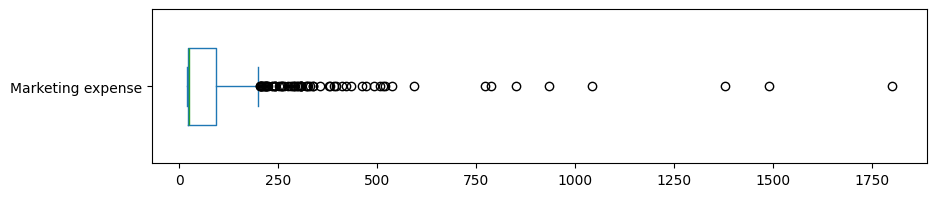

In [8]:
df["Marketing expense"].plot.box(vert=False, figsize=(10,2), widths=0.5)

<Axes: ylabel='Frequency'>

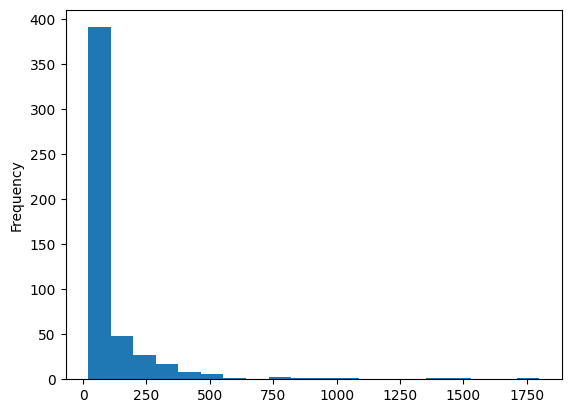

In [9]:
df["Marketing expense"].plot.hist(bins=20)

In [10]:
df["Genre"].value_counts()

Genre
Thriller    183
Comedy      155
Drama        97
Action       71
Name: count, dtype: int64

In [11]:
df["3D_available"].value_counts()

3D_available
YES    279
NO     227
Name: count, dtype: int64

In [12]:
pd.crosstab(df["Genre"], df["3D_available"])

3D_available,NO,YES
Genre,,
Action,38,33
Comedy,69,86
Drama,40,57
Thriller,80,103


<Axes: xlabel='Genre'>

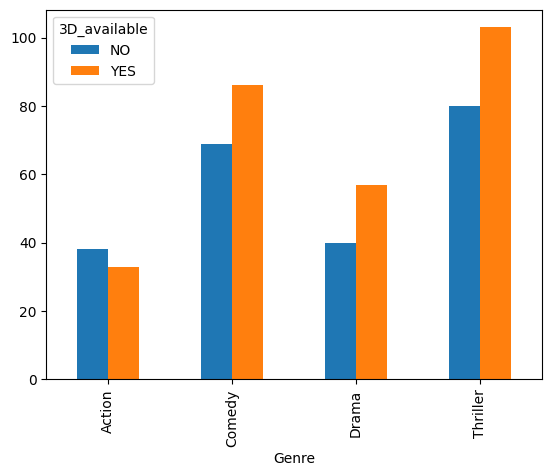

In [13]:
pd.crosstab(df["Genre"],df["3D_available"]).plot.bar()

In [14]:
pd.crosstab(df["Genre"], df["Start_Tech_Oscar"])

Start_Tech_Oscar,0,1
Genre,,
Action,32,39
Comedy,68,87
Drama,38,59
Thriller,92,91


<Axes: xlabel='Genre'>

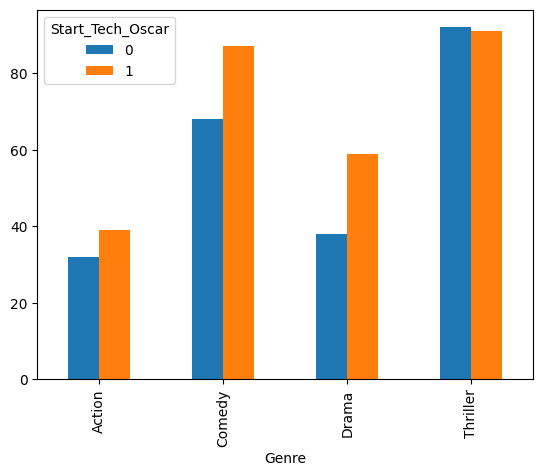

In [15]:
pd.crosstab(df["Genre"],df["Start_Tech_Oscar"] ).plot.bar()

In [16]:
df.isna().sum()

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
Start_Tech_Oscar        0
dtype: int64

In [17]:
num_cols = [i for i in df.columns if df[i].dtype!="object"]
num_cols

['Marketing expense',
 'Production expense',
 'Multiplex coverage',
 'Budget',
 'Movie_length',
 'Lead_ Actor_Rating',
 'Lead_Actress_rating',
 'Director_rating',
 'Producer_rating',
 'Critic_rating',
 'Trailer_views',
 'Time_taken',
 'Twitter_hastags',
 'Avg_age_actors',
 'Num_multiplex',
 'Collection',
 'Start_Tech_Oscar']

In [18]:
cat_cols = [i for i in df.columns if df[i].dtype=="object"]
cat_cols

['3D_available', 'Genre']

In [19]:
for i in cat_cols:
    print(df[i].value_counts())
    print("="*30)

3D_available
YES    279
NO     227
Name: count, dtype: int64
Genre
Thriller    183
Comedy      155
Drama        97
Action       71
Name: count, dtype: int64


<Axes: >

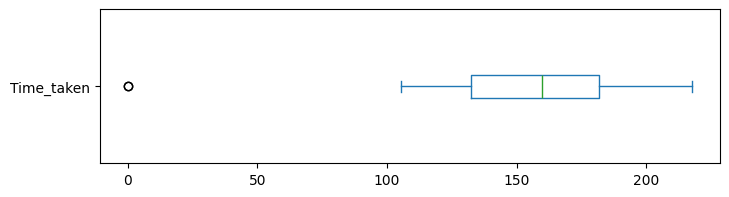

In [20]:
df["Time_taken"].plot.box(vert=False, figsize=(8,2))

In [21]:
df[df["Time_taken"] <= 0]

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
50,21.7746,66.28,0.561,33124.465,119.2,6.460,6.725,6.50,6.685,7.64,442225,YES,0.0,223.152,Thriller,21,404,39400,0
112,22.4658,75.02,0.453,32846.715,166.4,8.725,8.885,8.72,8.965,7.44,394329,YES,0.0,303.008,Thriller,35,577,37600,1


In [22]:
df[df["Time_taken"] >= 0]["Time_taken"].mean()

np.float64(157.3914979757085)

In [23]:
df["Time_taken"].fillna(157.391497, inplace=True)

In [24]:
df.isna().sum()

Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
3D_available           0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
Num_multiplex          0
Collection             0
Start_Tech_Oscar       0
dtype: int64

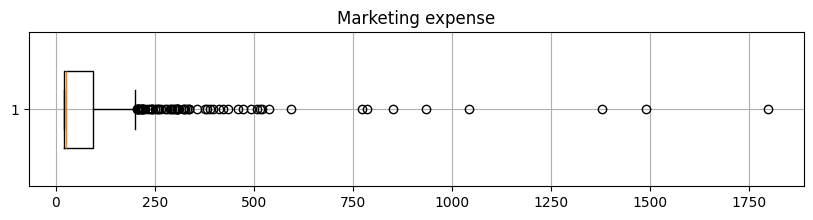

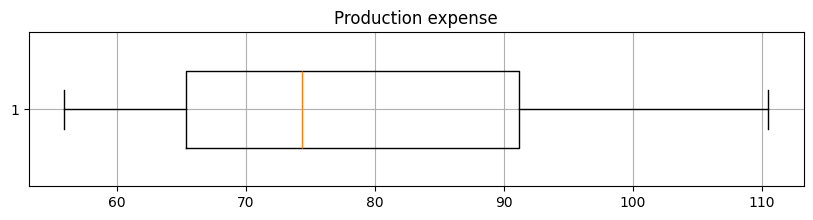

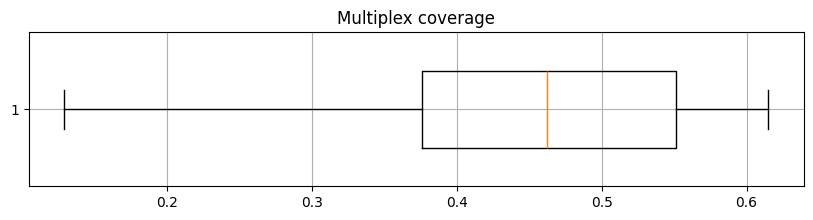

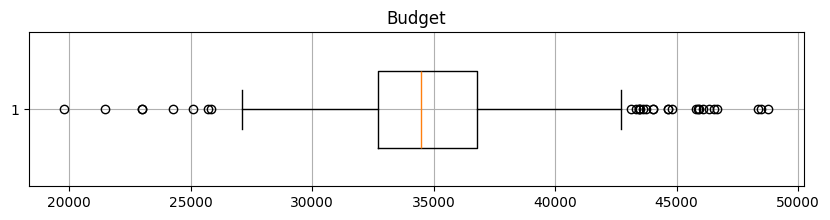

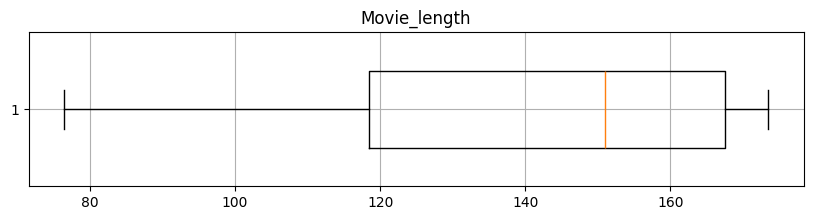

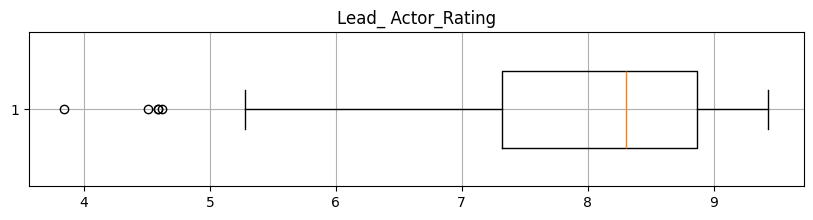

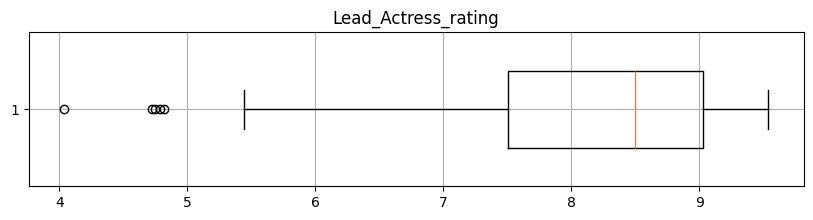

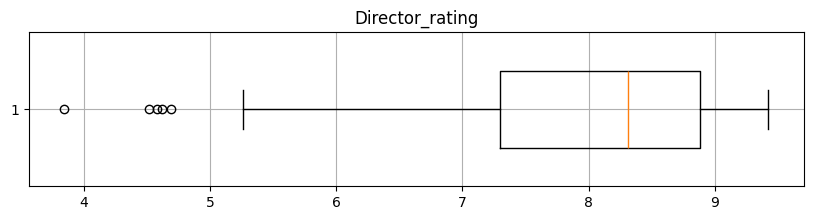

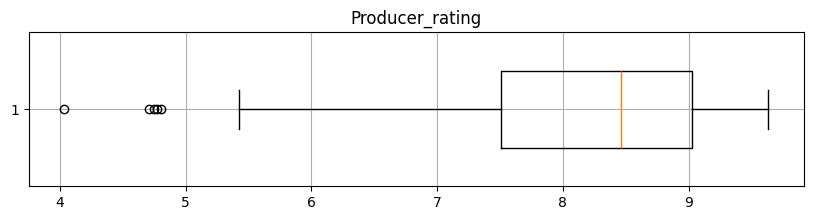

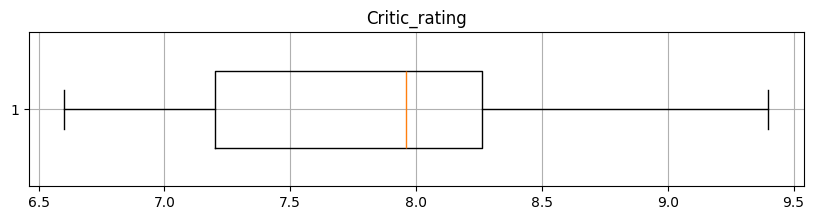

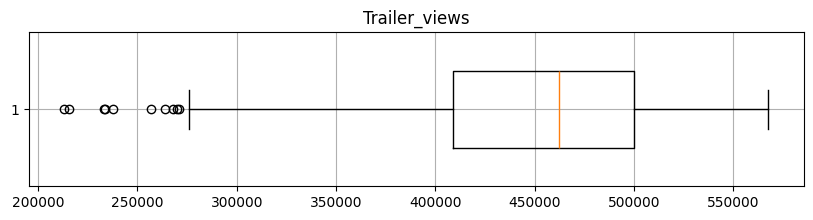

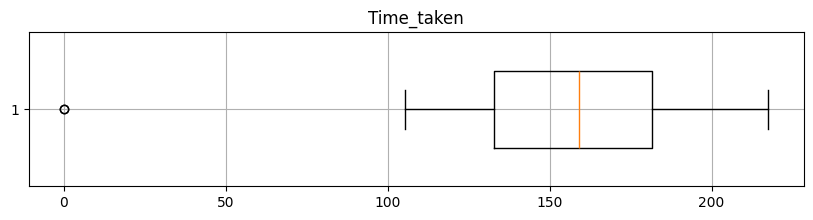

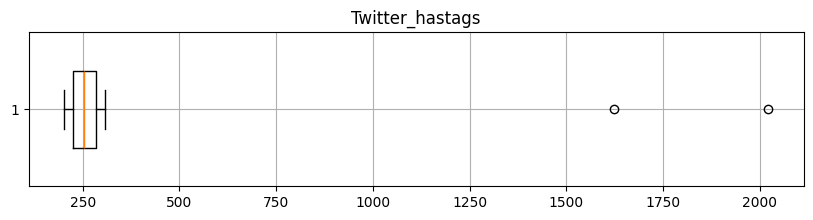

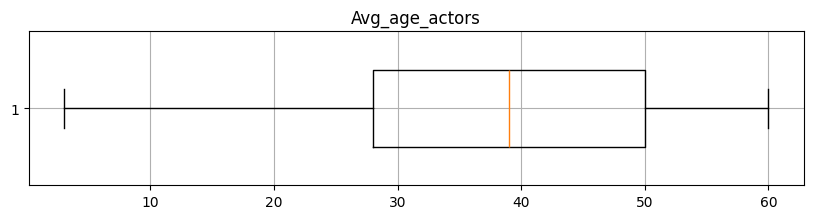

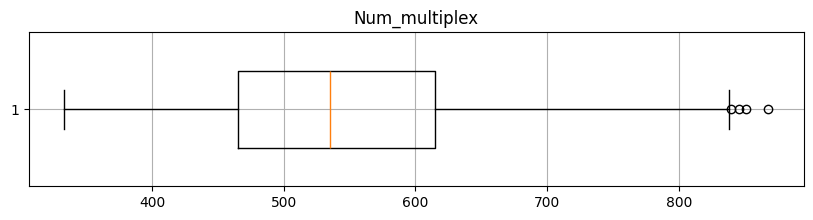

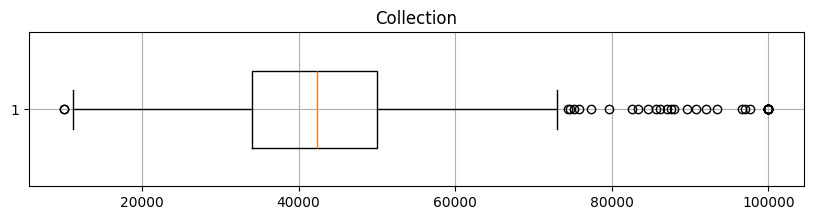

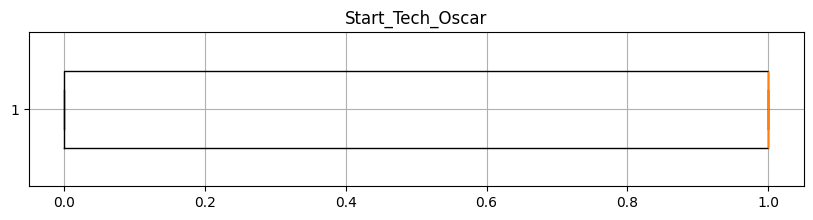

In [25]:
for i in num_cols:
    plt.figure(figsize=(10, 2))
    plt.boxplot(df[i], vert=False, widths=0.5)
    plt.grid()
    plt.title(i)
    plt.show()

In [26]:
df["Marketing expense"].quantile(0.98)

np.float64(520.4331999999999)

In [27]:
df = df[df["Marketing expense"]<=500]

In [28]:
df["Budget"].quantile(0.995)

np.float64(47568.798200000034)

In [29]:
df = df[df["Budget"]<=47568.79]

In [30]:
df["Budget"].quantile(0.009)

np.float64(24843.404300000002)

In [31]:
df = df[df["Budget"]>=24843.40]

In [32]:
df["Time_taken"].quantile(0.005)

np.float64(105.5616)

In [33]:
df["Time_taken"].min(), df["Time_taken"].max()

(np.float64(0.0), np.float64(217.52))

In [34]:
df = df[df["Time_taken"]>=105]

In [35]:
df["Lead_ Actor_Rating"].quantile(0.05)

np.float64(5.9555)

In [36]:
df = df[df["Lead_ Actor_Rating"]>=5.95]

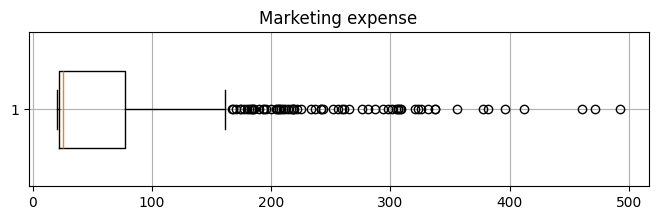

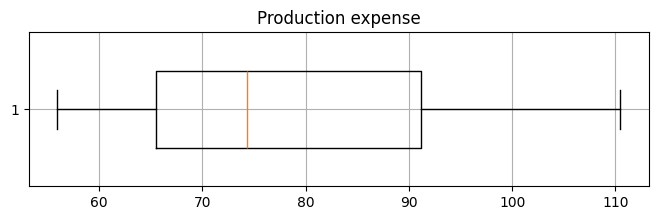

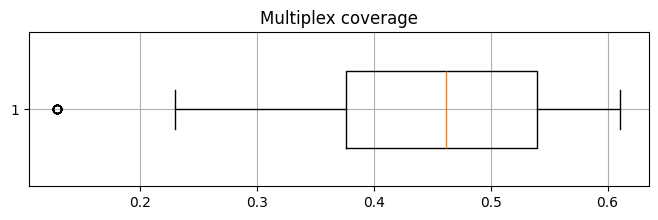

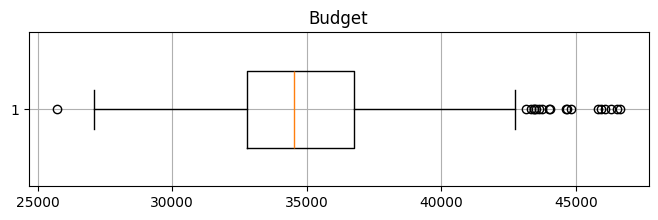

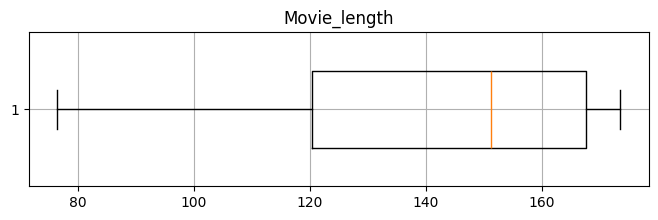

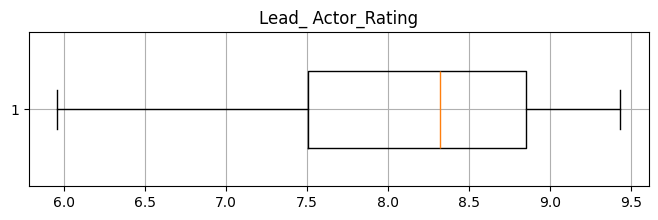

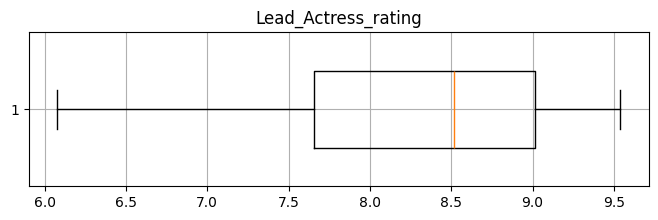

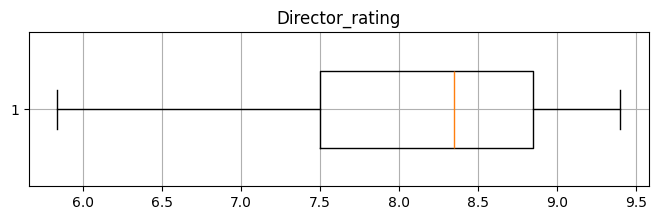

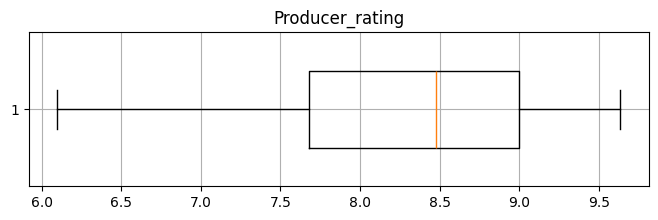

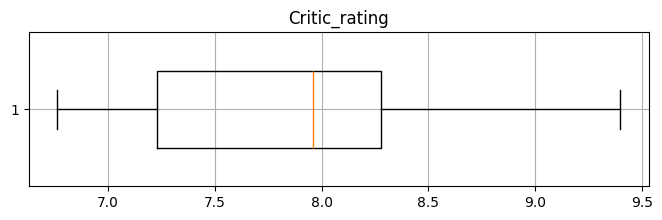

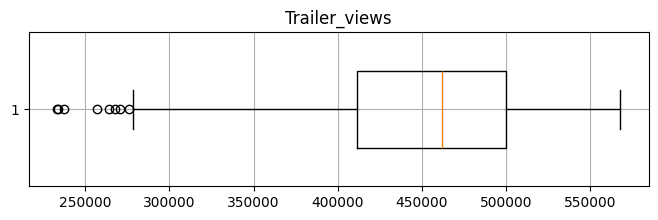

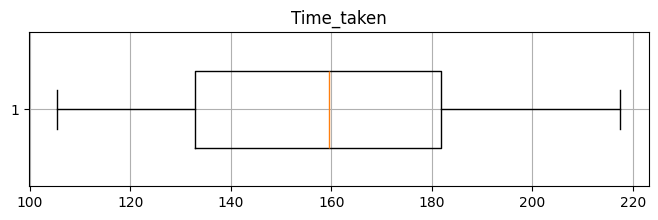

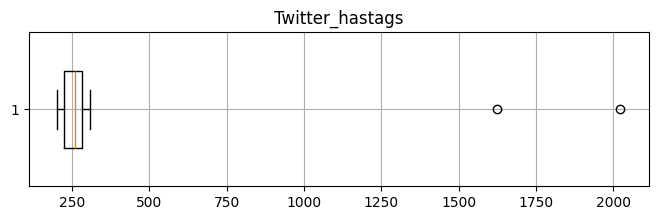

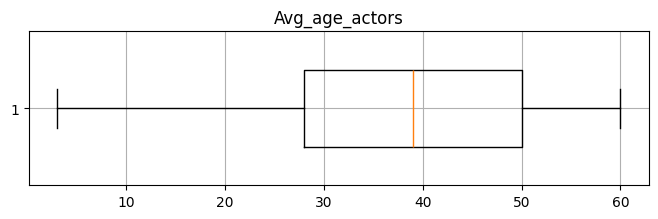

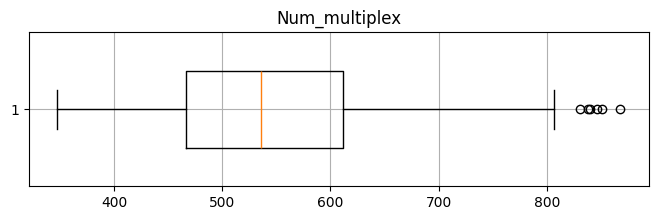

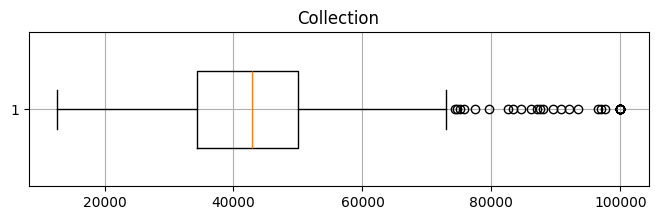

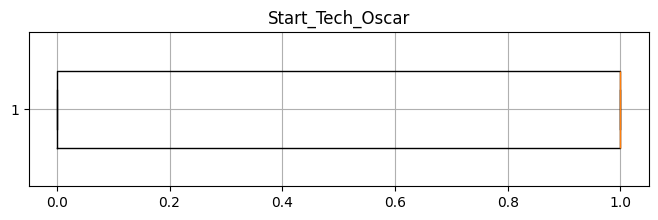

In [37]:
for i in num_cols:
    plt.figure(figsize=(8, 2))
    plt.boxplot(df[i], vert=False, widths=0.5)
    plt.grid()
    plt.title(i)
    plt.show()

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marketing expense,459.0,70.997387,88.678427,20.1264,21.6757,25.183,77.4238,492.964
Production expense,459.0,77.611024,13.581243,55.9200,65.5100,74.380,91.2000,110.480
Multiplex coverage,459.0,0.443105,0.114518,0.1290,0.3760,0.462,0.5400,0.611
Budget,459.0,35032.746678,3519.515001,25708.5400,32757.8350,34507.660,36765.7675,46650.890
Movie_length,459.0,142.587146,27.686832,76.4000,120.4500,151.200,167.5500,173.500
Lead_ Actor_Rating,459.0,8.104902,0.877699,5.9550,7.5075,8.320,8.8500,9.435
Lead_Actress_rating,459.0,8.275305,0.880882,6.0750,7.6550,8.515,9.0150,9.540
Director_rating,459.0,8.109815,0.884969,5.8350,7.5000,8.345,8.8450,9.400
Producer_rating,459.0,8.281068,0.877245,6.0950,7.6800,8.475,8.9975,9.635
Critic_rating,459.0,7.819259,0.662329,6.7600,7.2300,7.960,8.2800,9.400


In [39]:
genre_and_Oscar = pd.crosstab(df["Genre"], df["Start_Tech_Oscar"])
genre_and_Oscar

Start_Tech_Oscar,0,1
Genre,,
Action,32,35
Comedy,65,79
Drama,35,52
Thriller,85,76


In [40]:
pd.crosstab(df["Genre"], df["3D_available"])

3D_available,NO,YES
Genre,,
Action,37,30
Comedy,64,80
Drama,36,51
Thriller,71,90


In [41]:
ohe = OneHotEncoder(drop="first")

In [42]:
ohe.fit(df[cat_cols])

OneHotEncoder(drop='first')

In [43]:
ohe.get_feature_names_out()

array(['3D_available_YES', 'Genre_Comedy', 'Genre_Drama',
       'Genre_Thriller'], dtype=object)

In [44]:
encoded = pd.DataFrame(ohe.transform(df[cat_cols]).toarray(), columns=ohe.get_feature_names_out())

In [45]:
encoded

,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
454,0.0,0.0,0.0,0.0
455,1.0,0.0,0.0,0.0
456,0.0,1.0,0.0,0.0
457,1.0,1.0,0.0,0.0


In [46]:
df.reset_index(drop=True, inplace=True)

In [47]:
new_df = df.drop(cat_cols, axis=1)

In [48]:
new_df = pd.concat([new_df, encoded], axis=1)

In [49]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    459 non-null    float64
 1   Production expense   459 non-null    float64
 2   Multiplex coverage   459 non-null    float64
 3   Budget               459 non-null    float64
 4   Movie_length         459 non-null    float64
 5   Lead_ Actor_Rating   459 non-null    float64
 6   Lead_Actress_rating  459 non-null    float64
 7   Director_rating      459 non-null    float64
 8   Producer_rating      459 non-null    float64
 9   Critic_rating        459 non-null    float64
 10  Trailer_views        459 non-null    int64  
 11  Time_taken           459 non-null    float64
 12  Twitter_hastags      459 non-null    float64
 13  Avg_age_actors       459 non-null    int64  
 14  Num_multiplex        459 non-null    int64  
 15  Collection           459 non-null    int

In [50]:
new_df

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1.0,0.0,0.0,1.0
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0.0,0.0,1.0,0.0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0.0,1.0,0.0,0.0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1.0,0.0,1.0,0.0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,...,186.96,243.584,27,561,44800,0,0.0,0.0,0.0,0.0
455,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,...,132.24,263.296,20,600,41200,0,1.0,0.0,0.0,0.0
456,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,...,109.56,243.824,31,576,47800,0,0.0,1.0,0.0,0.0
457,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,...,158.80,303.520,47,607,44000,0,1.0,1.0,0.0,0.0


In [51]:
new_df.corr()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
Marketing expense,1.000000,0.535347,-0.567955,-0.180533,0.441197,0.506261,0.502273,0.505859,0.498248,-0.218392,...,-0.028904,0.029887,0.102966,0.508653,-0.413648,0.053991,-0.148237,0.129202,-0.041949,-0.124304
Production expense,0.535347,1.000000,-0.740829,-0.390486,0.616902,0.697879,0.699683,0.699189,0.696555,-0.237334,...,-0.017003,-0.006844,0.066516,0.684370,-0.474675,0.019130,-0.102428,0.107128,-0.035016,-0.119140
Multiplex coverage,-0.567955,-0.740829,1.000000,0.301461,-0.713088,-0.776729,-0.777463,-0.776787,-0.771912,0.130696,...,0.072454,0.011209,-0.107820,-0.914892,0.424213,-0.046556,0.069506,-0.092187,0.057345,0.057467
Budget,-0.180533,-0.390486,0.301461,1.000000,-0.214869,-0.199874,-0.196260,-0.192508,-0.195315,0.238465,...,0.028374,0.038846,-0.063370,-0.287687,0.713417,-0.022644,0.182474,-0.072220,0.019809,0.062271
Movie_length,0.441197,0.616902,-0.713088,-0.214869,1.000000,0.752918,0.750702,0.752205,0.751555,-0.215877,...,-0.038536,0.005251,0.098513,0.656452,-0.369177,0.059770,0.013566,0.117643,-0.001343,-0.116531
Lead_ Actor_Rating,0.506261,0.697879,-0.776729,-0.199874,0.752918,1.000000,0.996955,0.996742,0.991367,-0.176666,...,-0.005809,-0.000567,0.072581,0.710900,-0.251798,0.059696,-0.003247,0.077809,-0.046134,-0.061493
Lead_Actress_rating,0.502273,0.699683,-0.777463,-0.196260,0.750702,0.996955,1.000000,0.997285,0.991223,-0.172563,...,-0.002917,-0.005560,0.073730,0.712867,-0.249414,0.053095,0.000788,0.080233,-0.051084,-0.060466
Director_rating,0.505859,0.699189,-0.776787,-0.192508,0.752205,0.996742,0.997285,1.000000,0.991520,-0.172734,...,-0.007497,-0.005825,0.076115,0.714192,-0.247770,0.057582,0.003597,0.080822,-0.043946,-0.065874
Producer_rating,0.498248,0.696555,-0.771912,-0.195315,0.751555,0.991367,0.991223,0.991520,1.000000,-0.173558,...,-0.019198,-0.010941,0.063977,0.706475,-0.246888,0.050877,0.002607,0.084666,-0.042297,-0.062842
Critic_rating,-0.218392,-0.237334,0.130696,0.238465,-0.215877,-0.176666,-0.172563,-0.172734,-0.173558,1.000000,...,0.004133,-0.022039,-0.060604,-0.107130,0.340821,-0.020715,0.018958,-0.038275,0.044567,-0.013116


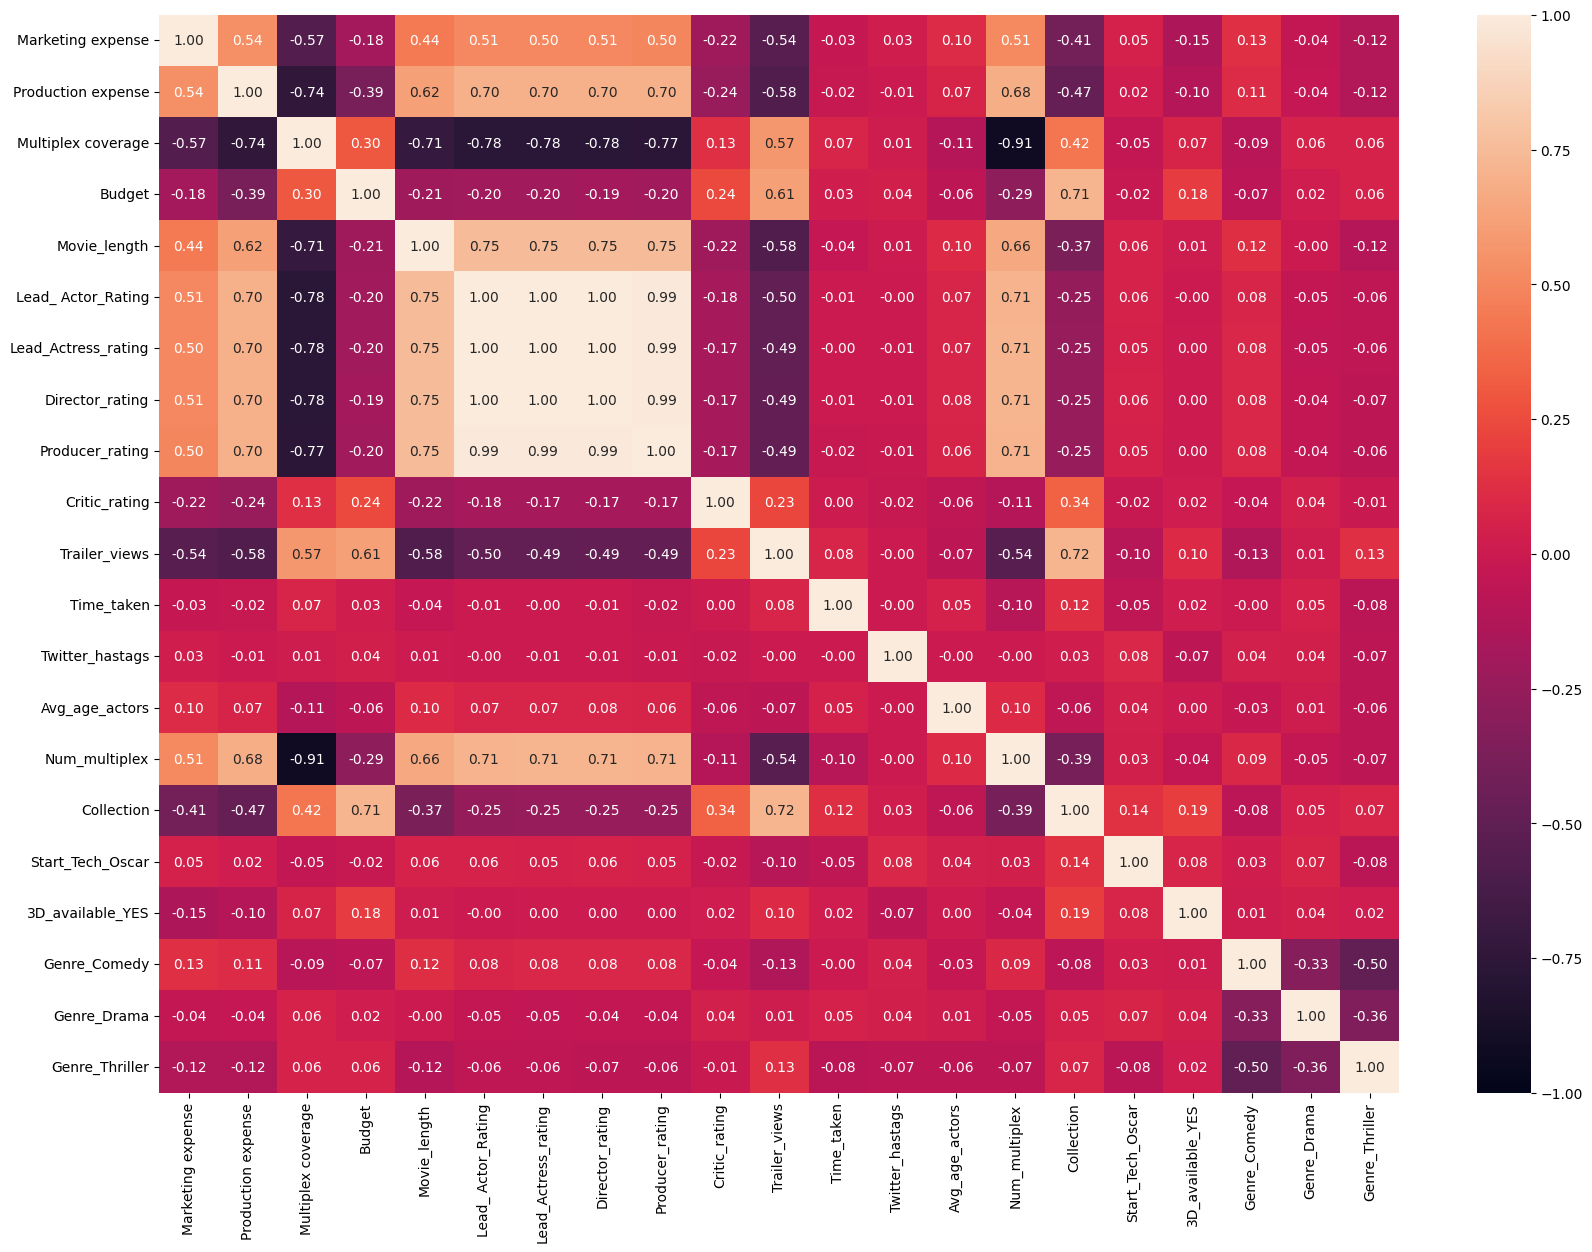

In [52]:
plt.figure(figsize=(20,14))
sns.heatmap(new_df.corr(), annot=True, vmin=-1,vmax=1, fmt=".2f")
plt.show()

In [53]:
new_df.corr()["Start_Tech_Oscar"]

Marketing expense      0.053991
Production expense     0.019130
Multiplex coverage    -0.046556
Budget                -0.022644
Movie_length           0.059770
Lead_ Actor_Rating     0.059696
Lead_Actress_rating    0.053095
Director_rating        0.057582
Producer_rating        0.050877
Critic_rating         -0.020715
Trailer_views         -0.099271
Time_taken            -0.054741
Twitter_hastags        0.082576
Avg_age_actors         0.040568
Num_multiplex          0.032883
Collection             0.139533
Start_Tech_Oscar       1.000000
3D_available_YES       0.075954
Genre_Comedy           0.028951
Genre_Drama            0.068258
Genre_Thriller        -0.081243
Name: Start_Tech_Oscar, dtype: float64

In [54]:
new_df.corr()["Collection"]

Marketing expense     -0.413648
Production expense    -0.474675
Multiplex coverage     0.424213
Budget                 0.713417
Movie_length          -0.369177
Lead_ Actor_Rating    -0.251798
Lead_Actress_rating   -0.249414
Director_rating       -0.247770
Producer_rating       -0.246888
Critic_rating          0.340821
Trailer_views          0.718210
Time_taken             0.118212
Twitter_hastags        0.026660
Avg_age_actors        -0.056894
Num_multiplex         -0.391646
Collection             1.000000
Start_Tech_Oscar       0.139533
3D_available_YES       0.187826
Genre_Comedy          -0.076983
Genre_Drama            0.053860
Genre_Thriller         0.072645
Name: Collection, dtype: float64

In [55]:
scaler = StandardScaler()

In [56]:
new_df[num_cols] = scaler.fit_transform(new_df[num_cols])

In [57]:
new_df

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,-0.574283,-1.326142,0.165172,0.424208,-0.140550,-0.319252,-0.204910,-0.226034,-0.326454,0.182496,...,-1.641923,-0.344514,-1.284231,-0.506299,0.139336,0.946939,1.0,0.0,0.0,1.0
1,-0.569544,-0.624410,0.768356,0.180878,0.354810,-0.684240,-0.710637,-0.757705,-0.925571,-0.573239,...,-0.390879,-0.165264,0.232738,-0.809447,-0.127283,-1.056034,0.0,0.0,1.0,0.0
2,-0.569548,-0.624410,0.768356,1.388047,-0.288797,-0.707052,-0.801554,-0.695488,-0.874218,-0.573239,...,-0.348998,16.090592,-0.086624,-0.847341,1.328013,0.946939,0.0,1.0,0.0,0.0
3,-0.568401,-1.345307,0.864515,1.092575,-0.842009,-1.379997,-1.409563,-1.345937,-1.439101,0.666167,...,0.916908,-0.330770,0.472259,-0.714713,1.183595,0.946939,1.0,0.0,1.0,0.0
4,-0.560120,-1.345307,0.864515,1.328005,-0.538284,-1.351483,-1.369787,-1.464714,-1.382042,0.666167,...,0.616981,-0.326676,1.270663,-1.444163,1.494650,0.946939,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,-0.561569,0.092064,-0.140790,0.452649,0.000465,0.655949,0.567886,0.577129,0.786194,-1.540581,...,0.970948,-0.164094,-0.964869,0.128417,-0.038410,-1.056034,0.0,0.0,0.0,0.0
455,-0.565489,0.092064,-0.140790,-0.294722,0.275263,0.770007,0.761085,0.746812,0.740547,-0.029110,...,-0.877246,0.016032,-1.523752,0.497878,-0.238374,-1.056034,1.0,0.0,0.0,0.0
456,-0.561991,0.092064,-0.140790,1.057814,0.792318,0.827037,0.789496,0.842965,0.831841,-0.029110,...,-1.643274,-0.161901,-0.645507,0.270517,0.128227,-1.056034,0.0,1.0,0.0,0.0
457,-0.550966,0.092064,-0.140790,0.770242,0.730850,0.712978,0.647438,0.780748,0.643547,-1.540581,...,0.019831,0.383596,0.631940,0.564192,-0.082847,-1.056034,1.0,1.0,0.0,0.0


In [58]:
X = new_df.drop("Start_Tech_Oscar", axis=1)

In [59]:
y = df["Start_Tech_Oscar"]

In [60]:
X

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,-0.574283,-1.326142,0.165172,0.424208,-0.140550,-0.319252,-0.204910,-0.226034,-0.326454,0.182496,1.152040,-1.641923,-0.344514,-1.284231,-0.506299,0.139336,1.0,0.0,0.0,1.0
1,-0.569544,-0.624410,0.768356,0.180878,0.354810,-0.684240,-0.710637,-0.757705,-0.925571,-0.573239,0.649189,-0.390879,-0.165264,0.232738,-0.809447,-0.127283,0.0,0.0,1.0,0.0
2,-0.569548,-0.624410,0.768356,1.388047,-0.288797,-0.707052,-0.801554,-0.695488,-0.874218,-0.573239,1.449174,-0.348998,16.090592,-0.086624,-0.847341,1.328013,0.0,1.0,0.0,0.0
3,-0.568401,-1.345307,0.864515,1.092575,-0.842009,-1.379997,-1.409563,-1.345937,-1.439101,0.666167,0.984665,0.916908,-0.330770,0.472259,-0.714713,1.183595,1.0,0.0,1.0,0.0
4,-0.560120,-1.345307,0.864515,1.328005,-0.538284,-1.351483,-1.369787,-1.464714,-1.382042,0.666167,1.213644,0.616981,-0.326676,1.270663,-1.444163,1.494650,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,-0.561569,0.092064,-0.140790,0.452649,0.000465,0.655949,0.567886,0.577129,0.786194,-1.540581,0.625414,0.970948,-0.164094,-0.964869,0.128417,-0.038410,0.0,0.0,0.0,0.0
455,-0.565489,0.092064,-0.140790,-0.294722,0.275263,0.770007,0.761085,0.746812,0.740547,-0.029110,0.480425,-0.877246,0.016032,-1.523752,0.497878,-0.238374,1.0,0.0,0.0,0.0
456,-0.561991,0.092064,-0.140790,1.057814,0.792318,0.827037,0.789496,0.842965,0.831841,-0.029110,1.225584,-1.643274,-0.161901,-0.645507,0.270517,0.128227,0.0,1.0,0.0,0.0
457,-0.550966,0.092064,-0.140790,0.770242,0.730850,0.712978,0.647438,0.780748,0.643547,-1.540581,0.679712,0.019831,0.383596,0.631940,0.564192,-0.082847,1.0,1.0,0.0,0.0


In [61]:
y

0      1
1      0
2      1
3      1
4      1
      ..
454    0
455    0
456    0
457    0
458    0
Name: Start_Tech_Oscar, Length: 459, dtype: int64

In [62]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.75, random_state=345)

In [63]:
X_tr.shape

(344, 20)

In [64]:
X_te.shape

(115, 20)

In [65]:
model = RandomForestClassifier(n_estimators=200, n_jobs=-1, max_depth=7)

In [66]:
model.fit(X_tr, y_tr)

RandomForestClassifier(max_depth=7, n_estimators=200, n_jobs=-1)

In [67]:
model.score(X_tr, y_tr)

0.9854651162790697

In [68]:
y_pr = model.predict(X_te)

In [69]:
accuracy_score(y_te, y_pr)

0.6086956521739131

In [70]:
df["Start_Tech_Oscar"].value_counts()

Start_Tech_Oscar
1    242
0    217
Name: count, dtype: int64

In [71]:
print(classification_report(y_te, y_pr))

              precision    recall  f1-score   support

           0       0.66      0.52      0.58        60
           1       0.57      0.71      0.63        55

    accuracy                           0.61       115
   macro avg       0.62      0.61      0.61       115
weighted avg       0.62      0.61      0.61       115



In [72]:
new_df["Start_Tech_Oscar"] = df["Start_Tech_Oscar"]

In [73]:
yes = new_df[new_df["Start_Tech_Oscar"]==1]
no = new_df[new_df["Start_Tech_Oscar"]==0]

In [74]:
len(yes), len(no)

(242, 217)

In [75]:
resampled_data = resample(yes, n_samples=len(no))

In [76]:
len(resampled_data)

217

In [77]:
resampled_data["Start_Tech_Oscar"]

397    1
408    1
16     1
124    1
441    1
      ..
244    1
249    1
149    1
156    1
334    1
Name: Start_Tech_Oscar, Length: 217, dtype: int64

In [78]:
sample = pd.concat([no, resampled_data], axis=0)
sample

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
1,-0.569544,-0.624410,0.768356,0.180878,0.354810,-0.684240,-0.710637,-0.757705,-0.925571,-0.573239,...,-0.390879,-0.165264,0.232738,-0.809447,-0.127283,0,0.0,0.0,1.0,0.0
5,-0.568970,-1.345307,0.864515,0.195098,-0.375575,-1.385700,-1.335693,-1.385529,-1.456219,-0.845304,...,-0.497610,0.210634,1.110982,-0.828394,0.661465,0,1.0,1.0,0.0,0.0
6,-0.555776,-0.506472,0.287557,-0.465369,-0.089929,-1.186098,-1.148176,-1.085757,-1.005454,1.724196,...,-0.643520,-0.163363,0.152897,-0.241045,0.017136,0,1.0,0.0,0.0,1.0
7,-0.543073,-0.506472,0.287557,-0.212558,0.976722,-1.283048,-1.364104,-1.396842,-1.267924,0.212726,...,-1.397389,-0.164533,1.350504,0.223151,-0.071737,0,0.0,0.0,1.0,0.0
10,-0.524934,-0.506472,0.287557,0.111355,0.911638,-1.630926,-1.625491,-1.566524,-1.393454,1.724196,...,-1.290658,-0.357672,-0.805188,0.289464,-0.860486,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,-0.455116,-1.081420,-0.787683,1.917369,0.734465,0.792819,0.823590,0.922150,0.820429,2.389244,...,-0.843471,-0.316588,-1.204390,0.981020,2.261181,1,1.0,0.0,0.0,0.0
249,-0.398314,-1.081420,-0.787683,1.117856,0.560909,0.895472,0.903143,0.803372,0.769076,2.389244,...,-1.213650,-0.517476,0.152897,0.289464,0.883648,1,0.0,0.0,0.0,1.0
149,-0.023298,1.219847,-2.745844,-1.634616,0.900791,1.026639,0.988378,1.091832,1.168488,0.363873,...,-1.046124,-0.543209,1.669866,1.909411,-1.071559,1,0.0,0.0,0.0,1.0
156,-0.232745,1.219847,-0.420528,3.268324,0.897175,0.872660,0.857684,0.780748,0.791900,1.875344,...,0.060361,-0.123741,1.430344,0.526298,3.027711,1,1.0,0.0,0.0,1.0


In [79]:
sample["Start_Tech_Oscar"].value_counts()

Start_Tech_Oscar
0    217
1    217
Name: count, dtype: int64

In [80]:
new_df.corr()["Start_Tech_Oscar"]

Marketing expense      0.053991
Production expense     0.019130
Multiplex coverage    -0.046556
Budget                -0.022644
Movie_length           0.059770
Lead_ Actor_Rating     0.059696
Lead_Actress_rating    0.053095
Director_rating        0.057582
Producer_rating        0.050877
Critic_rating         -0.020715
Trailer_views         -0.099271
Time_taken            -0.054741
Twitter_hastags        0.082576
Avg_age_actors         0.040568
Num_multiplex          0.032883
Collection             0.139533
Start_Tech_Oscar       1.000000
3D_available_YES       0.075954
Genre_Comedy           0.028951
Genre_Drama            0.068258
Genre_Thriller        -0.081243
Name: Start_Tech_Oscar, dtype: float64

In [81]:
sample = sample.drop(["Multiplex coverage", "Trailer_views", "Twitter_hastags", "Num_multiplex"], axis=1)

In [82]:
sample = sample.drop(["Avg_age_actors"],axis=1)

In [83]:
sample

,Marketing expense,Production expense,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Time_taken,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
1,-0.569544,-0.624410,0.180878,0.354810,-0.684240,-0.710637,-0.757705,-0.925571,-0.573239,-0.390879,-0.127283,0,0.0,0.0,1.0,0.0
5,-0.568970,-1.345307,0.195098,-0.375575,-1.385700,-1.335693,-1.385529,-1.456219,-0.845304,-0.497610,0.661465,0,1.0,1.0,0.0,0.0
6,-0.555776,-0.506472,-0.465369,-0.089929,-1.186098,-1.148176,-1.085757,-1.005454,1.724196,-0.643520,0.017136,0,1.0,0.0,0.0,1.0
7,-0.543073,-0.506472,-0.212558,0.976722,-1.283048,-1.364104,-1.396842,-1.267924,0.212726,-1.397389,-0.071737,0,0.0,0.0,1.0,0.0
10,-0.524934,-0.506472,0.111355,0.911638,-1.630926,-1.625491,-1.566524,-1.393454,1.724196,-1.290658,-0.860486,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,-0.455116,-1.081420,1.917369,0.734465,0.792819,0.823590,0.922150,0.820429,2.389244,-0.843471,2.261181,1,1.0,0.0,0.0,0.0
249,-0.398314,-1.081420,1.117856,0.560909,0.895472,0.903143,0.803372,0.769076,2.389244,-1.213650,0.883648,1,0.0,0.0,0.0,1.0
149,-0.023298,1.219847,-1.634616,0.900791,1.026639,0.988378,1.091832,1.168488,0.363873,-1.046124,-1.071559,1,0.0,0.0,0.0,1.0
156,-0.232745,1.219847,3.268324,0.897175,0.872660,0.857684,0.780748,0.791900,1.875344,0.060361,3.027711,1,1.0,0.0,0.0,1.0


In [84]:
X1 = sample.drop("Start_Tech_Oscar", axis=1)
y1 = sample["Start_Tech_Oscar"]

In [85]:
X1

,Marketing expense,Production expense,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Time_taken,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
1,-0.569544,-0.624410,0.180878,0.354810,-0.684240,-0.710637,-0.757705,-0.925571,-0.573239,-0.390879,-0.127283,0.0,0.0,1.0,0.0
5,-0.568970,-1.345307,0.195098,-0.375575,-1.385700,-1.335693,-1.385529,-1.456219,-0.845304,-0.497610,0.661465,1.0,1.0,0.0,0.0
6,-0.555776,-0.506472,-0.465369,-0.089929,-1.186098,-1.148176,-1.085757,-1.005454,1.724196,-0.643520,0.017136,1.0,0.0,0.0,1.0
7,-0.543073,-0.506472,-0.212558,0.976722,-1.283048,-1.364104,-1.396842,-1.267924,0.212726,-1.397389,-0.071737,0.0,0.0,1.0,0.0
10,-0.524934,-0.506472,0.111355,0.911638,-1.630926,-1.625491,-1.566524,-1.393454,1.724196,-1.290658,-0.860486,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,-0.455116,-1.081420,1.917369,0.734465,0.792819,0.823590,0.922150,0.820429,2.389244,-0.843471,2.261181,1.0,0.0,0.0,0.0
249,-0.398314,-1.081420,1.117856,0.560909,0.895472,0.903143,0.803372,0.769076,2.389244,-1.213650,0.883648,0.0,0.0,0.0,1.0
149,-0.023298,1.219847,-1.634616,0.900791,1.026639,0.988378,1.091832,1.168488,0.363873,-1.046124,-1.071559,0.0,0.0,0.0,1.0
156,-0.232745,1.219847,3.268324,0.897175,0.872660,0.857684,0.780748,0.791900,1.875344,0.060361,3.027711,1.0,0.0,0.0,1.0


In [86]:
y1

1      0
5      0
6      0
7      0
10     0
      ..
244    1
249    1
149    1
156    1
334    1
Name: Start_Tech_Oscar, Length: 434, dtype: int64

In [87]:
X_tr2, X_te2, y_tr2, y_te2 = train_test_split(X1, y1, test_size=0.25, random_state=234)

In [88]:
model2 = RandomForestClassifier(n_estimators=200, max_depth=7)

In [89]:
model2.fit(X_tr2, y_tr2)

RandomForestClassifier(max_depth=7, n_estimators=200)

In [90]:
model2.score(X_tr2, y_tr2)

0.9815384615384616

In [91]:
y_pr2 = model2.predict(X_te2)

In [92]:
accuracy_score(y_te2, y_pr2)

0.6788990825688074

In [93]:
lr = LogisticRegression()

In [94]:
lr.fit(X_tr, y_tr)

LogisticRegression()

In [95]:
lr.score(X_tr, y_tr)

0.6308139534883721

In [96]:
lr_pred = lr.predict(X_te)

In [97]:
accuracy_score(y_te, lr_pred)

0.5304347826086957

In [98]:
kf = KFold(n_splits=10)
cvs = cross_val_score(estimator=RandomForestClassifier(n_estimators=250, max_depth=7), X=X_tr, y=y_tr,
                     n_jobs=-1, cv=kf, verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.0s finished


In [99]:
cvs.mean()

np.float64(0.6076470588235294)

In [100]:
lr2 = LogisticRegression()

In [101]:
lr2.fit(X_tr2, y_tr2)

LogisticRegression()

In [102]:
lr2.score(X_tr2, y_tr2)

0.6338461538461538

In [103]:
lr_pred2 = lr2.predict(X_te2)

In [104]:
accuracy_score(y_te2, lr_pred2)

0.5963302752293578

In [105]:
kf2 = KFold(n_splits=10)
cvs2 = cross_val_score(estimator=RandomForestClassifier(n_estimators=150, max_depth=7), X=X_tr2, y=y_tr2,
                     n_jobs=-1, cv=kf2, verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.2s finished


In [106]:
cvs2.mean()

np.float64(0.6985795454545455)

In [107]:
print(classification_report(y_te, y_pr))

              precision    recall  f1-score   support

           0       0.66      0.52      0.58        60
           1       0.57      0.71      0.63        55

    accuracy                           0.61       115
   macro avg       0.62      0.61      0.61       115
weighted avg       0.62      0.61      0.61       115



In [108]:
print(classification_report(y_te2, y_pr2))

              precision    recall  f1-score   support

           0       0.70      0.66      0.68        56
           1       0.66      0.70      0.68        53

    accuracy                           0.68       109
   macro avg       0.68      0.68      0.68       109
weighted avg       0.68      0.68      0.68       109



As per the Observation of the model accuracy the data is underfitted and it support the Logistic Regression model after resampling the data.